# **Boosting**

Boosting ensemble is a type of ensemble learning (Supervised Machine Learning) that involves training multiple models in sequence, where each model is trained to correct the errors of the previous models, and the final prediction is a weighted combination of the predictions of the models.

Boosting ensemble can reduce the bias of the final prediction, and improve the generalization performance of the model.

## Goal

The goal is to prioritize samples that were incorrectly categorized in previous iterations, allowing the model to learn from its mistakes and improve its performance iteratively.

The boosting approach is designed to produce a strong learner that is accurate on the training data and can generalize effectively to new data.

## How Does Boosting Work?

1. Firstly, a model is built from the training data.
2. Then the second model is built which tries to correct the data errors present in the first model.
3. This procedure is continued and models are added until either the complete training data set is predicted correctly or the maximum number of models is added.


- Initialize equal weights to each training data.
- Train a weak learner.
- Error calculation.
- Updated weights.
- Repeat.
- Combine weak learners.
- Forecast

![Boosting](./images/boosting.png)

## Advantages

1. Improved Performance.
2. Ability to Handle Complex Data.
3. Robustness to Noise.
4. Flexibility.
5. Interpretability.

Use for classification, regression problems. Applications are NLP, Image and Speech Recognition, Recommendation Systems, Time Series Analysis

## AdaBoost (Adaptive Boosting)

AdaBoost is one of the most extensively used boosting algorithms. It gives weights to each data point in the training set based on the accuracy of prior models, and then trains a new model using the updated weights. AdaBoost is very useful for classification tasks.

## Gradient Boosting

Gradient Boosting works by fitting new models to the residual errors of prior models. It minimizes the loss function using gradient descent and may be applied to both regression and classification problems. Popular gradient-boosting implementations include XGBoost and LightGBM.

## XGBoost (Extreme Gradient Boosting)

XGBoost (Extreme Gradient Boosting) is a type of boosting ensemble that uses a gradient descent algorithm to optimize the performance of the model, and is widely used in practice due to its efficiency and effectiveness.

## CatBoost

An open-source machine learning algorithm that can handle categorical data directly and is based on gradient boosting.

## Stochastic Gradient Boosting

Similar to Gradient Boosting, Stochastic Gradient Boosting fits each new model with random subsets of the training data and random subsets of the features. This helps to avoid overfitting and may result in improved performance.

## LPBoost (Linear Programming Boosting)

LPBoost is a boosting algorithm that minimizes the exponential loss function using linear programming. It is capable of handling a wide range of loss functions and may be applied to both regression and classification issues.



## **Can Ensemble Methods Compete with Neural Networks?**

The answer depends on the specific problem and the nature of the data:

- `Structured Data`: For many tasks involving structured data (e.g., tabular data), ensemble methods like Random Forest and Gradient Boosting often outperform neural networks due to their ability to handle categorical features and missing values effectively.

- `Small to Medium-sized Datasets`: Ensemble methods can be more effective when the dataset size is small to medium. Neural networks may overfit or underperform due to insufficient data.

- `Unstructured Data`: For tasks involving unstructured data (e.g., images, text), neural networks, particularly deep learning models, are typically more effective.

### Conclusion

Ensemble learning methods (bagging and boosting) are powerful and can sometimes outperform neural networks, especially on structured data and smaller datasets. However, for tasks requiring the extraction of complex patterns from large amounts of unstructured data, neural networks are usually more suitable.

___

# **Comparison of Individual, Bagging and Boosting Algorithms**

In [1]:
# !pip install xgboost -q

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # Bagging
from xgboost import XGBClassifier # Boosting

In [3]:
# import the data
df = sns.load_dataset('diamonds')

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 10)

In [7]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

In [8]:
# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encode the target variable
y = le.fit_transform(y)

In [9]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
%%time

# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.71449758991472
Precision score:  0.71449758991472
Recall score:  0.71449758991472
F1 score:  0.71449758991472
CPU times: total: 625 ms
Wall time: 679 ms


In [11]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.7920837968112718
Precision score:  0.7920837968112718
Recall score:  0.7920837968112718
F1 score:  0.7920837968112718
CPU times: total: 13.4 s
Wall time: 17.7 s


In [12]:
%%time
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.803299962921765
Precision score:  0.803299962921765
Recall score:  0.803299962921765
F1 score:  0.803299962921765
CPU times: total: 8.53 s
Wall time: 4.25 s


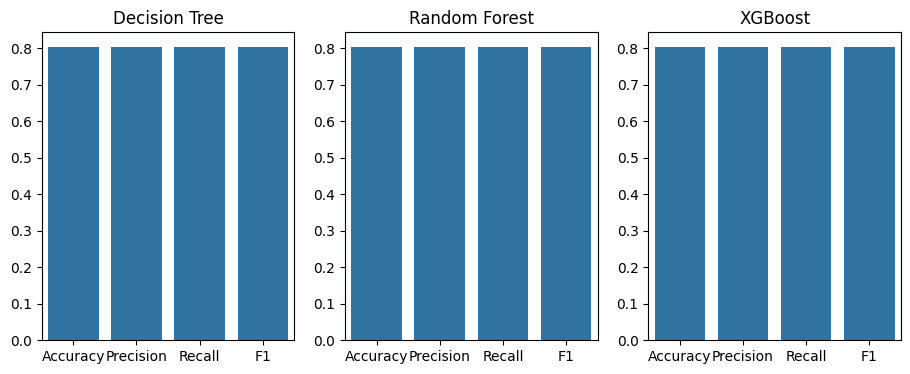

In [13]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()